**Disclaimer**

* I generally don't do this but since there are some sickos out there (I hope sickos don't read python tutorials), 
* and also this publicly available data concerns the most vulnarable citizens
* This notebook used said publicly available data for educational purpose only (City uses it for social development, that's a good place to start)
 

##  Import packages

In [75]:
import gmplot
import googlemaps
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [18]:
#style.use('ggplot')
%matplotlib inline

## Import Data

__**Background on Data**__

* This data was obtained from **Cape Town Open Data Portal** available at
https://web1.capetown.gov.za/web1/opendataportal/DatasetDetail?DatasetName=Street%20people

* **Data set name:** Street people(Name as is from the website, not my handwriting)
* **Description:** Street people enumeration survey data.The overarching aim of this research study was to enumerate and profile street persons, to understand the phenomenon of homelessness.
* **Time coverage:** 2014 - 2015
* **Spatial coverage:** Not spatial
* **Subject:** Social development
* **Update frequency:** Subject to change



In [22]:
data = pd.read_excel('Street people head count 19.8.2015.xlsx', sheetname='Dataset with words')
data.head()

,Object ID,ID,Capturer,Date,Page,Grid,Gender,Age,Race,What is the person doing,...,Group,Number of people in the group,Where was the person sleeping/ observed?,Street Name,Area,long,lat,Planning Suburb,Ward,Subcouncil
0,291,G351,Melrose,12/5/2015,58,BV36,Male,26-35,Black African,Job Seeker,...,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1
1,292,G352,Melrose,12/5/2015,58,BV36,Male,26-35,Black African,Job Seeker,...,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1
2,293,G353,Melrose,12/5/2015,58,BV36,Male,46-55,Black African,Job Seeker,...,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1
3,294,G354,Melrose,12/5/2015,58,BV36,Male,26-35,Black African,Job Seeker,...,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1
4,295,G3618,Melrose,12/5/2015,58,BV 36,Male,36-45,Black African,Job Seeker,...,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1


In [23]:
data.info()

# From initial observation it will be difficult indexing these column names becuase some of them
# Are sentenses, so some grunt work ahead to rename the columns to shorter names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 21 columns):
Object ID                                   5844 non-null int64
ID                                          5844 non-null object
Capturer                                    5844 non-null object
Date                                        5844 non-null object
Page                                        5844 non-null int64
Grid                                        5844 non-null object
Gender                                      5844 non-null object
Age                                         5841 non-null object
Race                                        5844 non-null object
What is the person doing                    5844 non-null object
Job Seeker versus Living on the street      5844 non-null object
Group                                       5844 non-null object
Number of people in the group               5839 non-null float64
Where was the person sleeping/ observed?    5844 

In [24]:
data.describe()

,Object ID,Page,Number of people in the group,long,lat,Ward
count,5844.000000,5844.000000,5839.000000,5844.000000,5844.000000,5844.000000
mean,2922.500000,103.468001,3.715362,18.551001,-33.948524,56.434805
std,1687.161818,42.404471,4.797098,0.121475,0.100003,30.990650
min,1.000000,24.000000,1.000000,18.338848,-34.199626,1.000000
25%,1461.750000,82.000000,1.000000,18.442811,-34.031435,27.000000
50%,2922.500000,87.000000,2.000000,18.526474,-33.927468,62.000000
75%,4383.250000,141.000000,4.000000,18.629988,-33.904032,77.000000
max,5844.000000,205.000000,31.000000,18.927702,-33.540365,111.000000


In [25]:
data.columns

Index(['Object ID', 'ID', 'Capturer', 'Date', 'Page', 'Grid', 'Gender', 'Age',
       'Race', 'What is the person doing',
       'Job Seeker versus Living on the street', 'Group',
       'Number of people in the group',
       'Where was the person sleeping/ observed?', 'Street Name', 'Area',
       'long', 'lat', 'Planning Suburb', 'Ward', 'Subcouncil'],
      dtype='object')

In [12]:
# I do not see any use for these columns, so I will start by dropping them
data.drop(['Object ID','ID','Page', 'Grid'], axis=1, inplace=True)
data.head(2)

In [45]:
data.rename(columns={'Capturer': 'capturer', 'Date':'date', 'Gender':'gender', 'Age':'age', 'Race':'race',
                     'What is the person doing':'p_doing', 'Job Seeker versus Living on the street':'jskr_lstr',
                     'Group':'group', 'Number of people in the group':'g_size', 
                     'Where was the person sleeping/ observed?':'dwelling', 
                     'Street Name':'str_name', 'Area':'area', 'X GPS Co ordinate':'long', 'Y GPS Co ordinate':'lat', 
                     'Planning Suburb':'p_sub', 'Ward':'ward', 'Subcouncil':'sub_co'}, inplace=True)
data.head(2)

,capturer,date,gender,age,race,p_doing,jskr_lstr,group,g_size,dwelling,str_name,area,long,lat,p_sub,ward,sub_co
0,Melrose,12/5/2015,Male,26-35,Black African,Job Seeker,Job Seeker,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1
1,Melrose,12/5/2015,Male,26-35,Black African,Job Seeker,Job Seeker,Yes,8.0,Pavement,Tinkers Pl.,Summer Greens,18.528068,-33.881379,SUMMER GREENS,4,Subcouncil 1


## Demographics Analysis

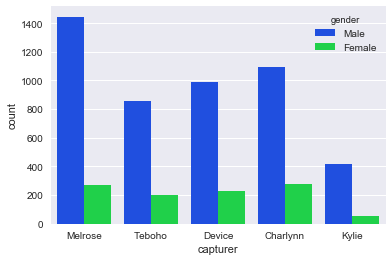

In [132]:
sns.countplot(x='capturer', data=data, hue='gender',palette='bright')

* Before we dive deep, let's first compare the capturers' data
* Melrose has more records for males and ties with Charlynn for females
* It is not clear from the data how the device capturer collects data

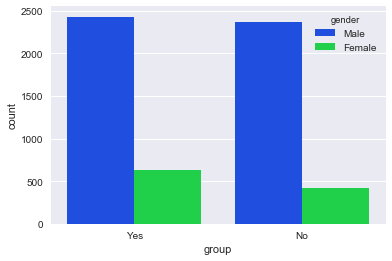

In [133]:
sns.countplot(x='group', data=data, hue='gender',palette='bright')

* The number for males in groups and lone rangers is 50/50
* More women are in groups than lone rangers, which makes sense, women tend to travel in groups for security reasons

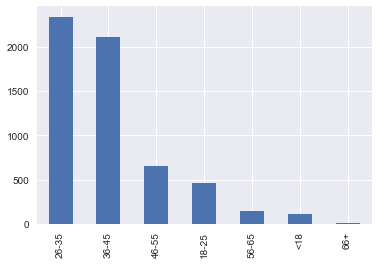

In [134]:
data['age'].value_counts().plot(kind = 'bar')
plt.show()

* 26-45 Age group makes up 76% of documented person for both genders
* Under 18's make up 1.8%
* Senior citizens above 66 make up 0.14%

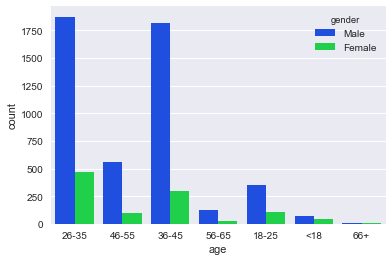

In [124]:
sns.countplot(x='age', data=data, hue='gender',palette='bright')

* Breaking down the age based on gender, we see that more woman who were documeted were between 26-45
* Same applies for males
* A fraction for under 18's, for both genders, these kids suppose to be in school by the way

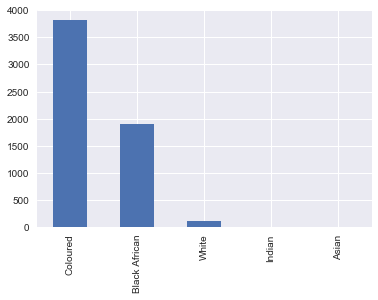

In [42]:
data['race'].value_counts().plot(kind = 'bar')
plt.show()

** This is Cape Town's Population as it stands [warning: numbers are from Wikipeadia :)] **

* 42.4% "Coloured"
* 38.6% "Black African"
* 15.7% "White"
* 1.4% "Asian or Indian"
* 1.9% other

_Now from Data_

* Coloured documented: 65.3%
* Black African documented: 32.5%
* White documented: 1.9%
* Indian and Asian documented: 0.17%



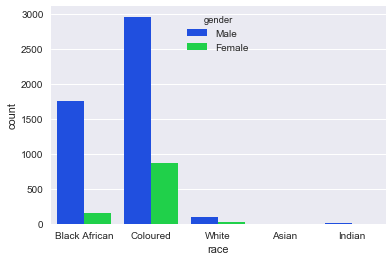

In [123]:
sns.countplot(x='race', data=data, hue='gender',palette='bright')

* Almost a 1000 coloured women were documented

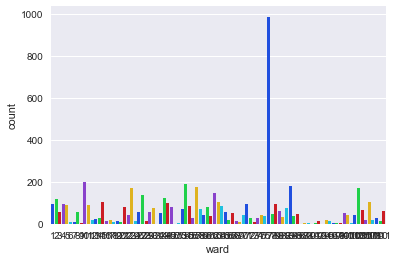

In [127]:
sns.countplot(x='ward', data=data, palette='bright')

* From the terribly squashed plot above you can see ward 77 has a higher number of recorded persons
* So ward 77 is worth exploring

In [137]:
max(data['ward'].value_counts())

987

In [138]:
# I am creating a ward 77 separate dataframe
ward_77 = data[data['ward']==77]
ward_77.head(2)

,capturer,date,gender,age,race,p_doing,jskr_lstr,group,g_size,dwelling,str_name,area,long,lat,p_sub,ward,sub_co
1295,Teboho,19/5/2015,Male,36-45,Coloured,Sleeping,Living and Sleeping on the street,Yes,25.0,Under Bridge,Buitengracht,Cape Town CBD,18.414231,-33.923283,SCHOTSCHEKLOOF,77,Subcouncil 16
1296,Teboho,19/5/2015,Female,36-45,Black African,Sleeping,Living and Sleeping on the street,Yes,25.0,Under Bridge,Buitengracht,Cape Town CBD,18.414231,-33.923283,SCHOTSCHEKLOOF,77,Subcouncil 16


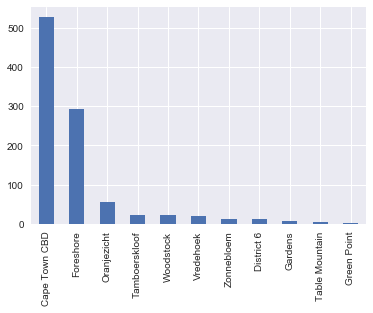

In [139]:
ward_77['area'].value_counts().plot(kind = 'bar')
plt.show()

* Cape Town CBD and Foreshore Make up the 83% of Ward 77  documented persons (820/987)
* The rest combined make 17% [What is that word that rhymes with prioritizing again]

## Living Dynamics

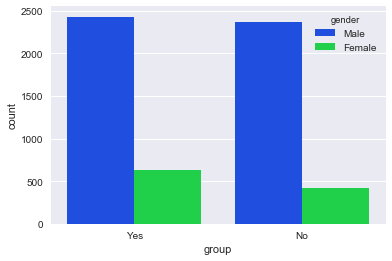

In [122]:
sns.countplot(x='group', data=data, hue='gender',palette='bright')

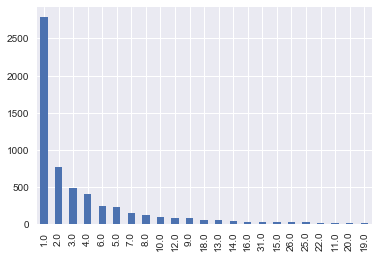

In [117]:
data['g_size'].value_counts().plot(kind = 'bar')
plt.show()

* There are more lone rangers than groups 
* Followed by two by two's
* I think it is interesting that there is a recorded group of 25

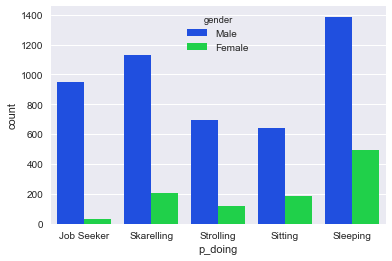

In [121]:
sns.countplot(x='p_doing', data=data, hue='gender',palette='bright')

* Skarelling - Recycling plastics and boxes to make money
* A large number of females spend their time sleeping, only a few looking for a job
* Overall sleep seems to be more popular than othe activities that consumes energy

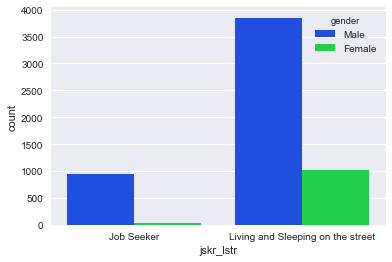

In [128]:
sns.countplot(x='jskr_lstr', data=data, hue='gender',palette='bright')

* A big part for both male and female are permanently living on the streets
* A small fraction of females are seeking jobs

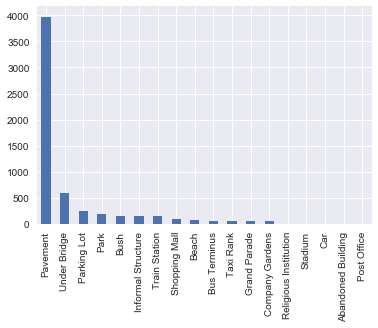

In [130]:
data['dwelling'].value_counts().plot(kind = 'bar')
plt.show()

* It is a common scene seeing people sleeping on the pavement next to building at CBD, the data confirms that
* I also expected religious institutions for have more presence that it shows on the data

## Geolocation and Clusters

In [56]:
gmaps = googlemaps.Client(key='')

In [57]:
gmap = gmplot.GoogleMapPlotter(-33.926379, 18.591878, 10, apikey='')

In [72]:
gmap.heatmap(data['long'], data['lat'], radius=15)

In [73]:
gmap.draw("mymap_2.html")

In [74]:
from IPython.display import IFrame
IFrame(src='mymap_2.html', width=720, height=520)

* The dispersion heatmap confirms that Cape Town and Foreshore has a higher concentration
* One interesting observation to make here is that the dispersion follows main roads, high traffic areas
* And also on the outer shore line, they start from Greenpoint and head north

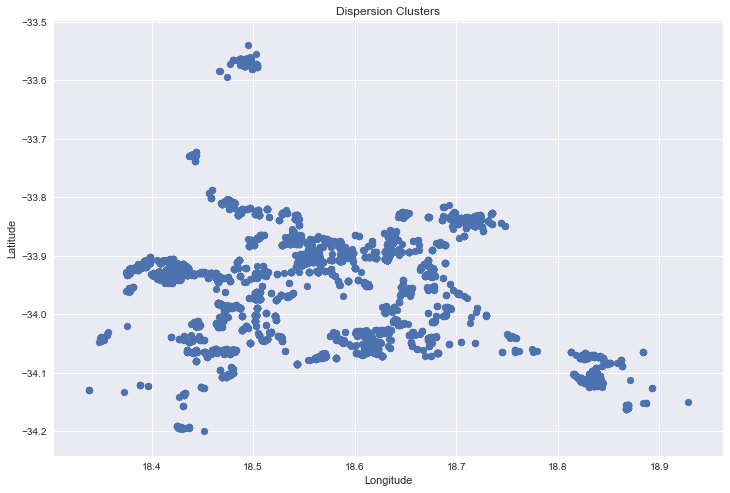

In [140]:
plt.figure(figsize=(12,8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dispersion Clusters')
plt.scatter(data['long'], data['lat'])
plt.show()

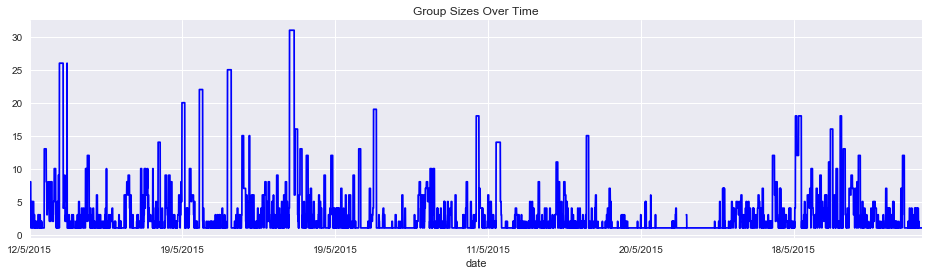

In [76]:
tlen = pd.Series(data=data['g_size'].values, index=data['date'])
# Lengths along time:
tlen.plot(figsize=(16,4), color='b', title='Group Sizes Over Time');

_Group numbers over time_

* From the beginning 11th of May they were lower and increase towards the 20th, as it gets colder it is wise to team up
* And also there tends to be fire places where everybody ends up clustering around like Station Road, Woodstock